In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import tushare as ts
import datetime

# 目标，有两种买卖策略，计算收益
*策略1：每月第一个交易日按开盘价买入，每年最后一个交易日卖出，今年未到年底不卖出，每股价格以昨日收盘价为价格计算  

*策略2：每月第一个交易日按开盘价买入，一只持有不卖出，每股价格以昨日收盘价为价格计算  

注意：  
开始时间：2010年1月1日  
每月买入价格以开盘价为准  
未卖出的股票以昨日收盘价为准  
一月买入一手，一年买入12手，1200支，卖出一共1200支  

In [2]:
df = ts.get_k_data('600519',start='2010-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2010-01-04,109.760,108.446,109.760,108.044,44304.88,600519
1,2010-01-05,109.116,108.127,109.441,107.846,31513.18,600519
2,2010-01-06,107.840,106.417,108.165,106.129,39889.03,600519
3,2010-01-07,106.417,104.477,106.691,103.302,48825.55,600519
4,2010-01-08,104.655,103.379,104.655,102.167,36702.09,600519
...,...,...,...,...,...,...,...
2880,2021-11-19,1794.190,1828.410,1849.000,1788.200,31156.00,600519
2881,2021-11-22,1849.000,1854.270,1909.000,1848.000,42573.00,600519
2882,2021-11-23,1852.000,1896.430,1917.000,1852.000,45782.00,600519
2883,2021-11-24,1900.000,1941.000,1966.000,1897.000,54512.00,600519


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 2884
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2885 non-null   object 
 1   open    2885 non-null   float64
 2   close   2885 non-null   float64
 3   high    2885 non-null   float64
 4   low     2885 non-null   float64
 5   volume  2885 non-null   float64
 6   code    2885 non-null   object 
dtypes: float64(5), object(2)
memory usage: 180.3+ KB


In [4]:
df.date = df.date.astype('datetime64')
df.set_index('date',inplace=True)
df

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,109.760,108.446,109.760,108.044,44304.88,600519
2010-01-05,109.116,108.127,109.441,107.846,31513.18,600519
2010-01-06,107.840,106.417,108.165,106.129,39889.03,600519
2010-01-07,106.417,104.477,106.691,103.302,48825.55,600519
2010-01-08,104.655,103.379,104.655,102.167,36702.09,600519
...,...,...,...,...,...,...
2021-11-19,1794.190,1828.410,1849.000,1788.200,31156.00,600519
2021-11-22,1849.000,1854.270,1909.000,1848.000,42573.00,600519
2021-11-23,1852.000,1896.430,1917.000,1852.000,45782.00,600519


In [5]:
# 寻找每月的第一个交易日的开盘价,resample重新取样
df_monthly = df.resample('M').first()
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2010-01-31,109.760,108.446,109.760,108.044,44304.88,600519
2010-02-28,107.769,107.776,108.216,106.576,29655.94,600519
2010-03-31,106.219,106.085,106.857,105.925,21734.74,600519
2010-04-30,101.324,102.141,102.422,101.311,23980.83,600519
2010-05-31,81.676,82.091,82.678,80.974,23975.16,600519
...,...,...,...,...,...,...
2021-07-31,2059.970,2105.000,2110.000,2031.600,33701.00,600519
2021-08-31,1664.000,1755.000,1755.980,1620.720,97401.00,600519
2021-09-30,1559.000,1622.010,1634.990,1531.100,77316.00,600519


In [6]:
# 买入股票花费总金额
cost = df_monthly.open.sum()*100
count = df_monthly.open.count()*100
print('买入总金额：'+str(cost))
price_mean = cost/count
print(price_mean)
print('买入均价：'+str(price_mean))

买入总金额：7637842.100000001
534.1148321678322
买入均价：534.1148321678322


In [7]:
# 查找每年最后一个交易日的数据
df_yearly = df.resample('A').last()[:-1]
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2010-12-31,117.103,118.469,118.701,116.620,46084.0,600519
2011-12-31,138.039,138.468,139.600,136.105,29460.0,600519
2012-12-31,155.208,152.087,156.292,150.144,51914.0,600519
2013-12-31,93.188,96.480,97.179,92.061,57546.0,600519
2014-12-31,157.642,161.056,161.379,157.132,46269.0,600519
2015-12-31,207.487,207.458,208.704,207.106,19673.0,600519
2016-12-31,317.239,324.563,325.670,317.239,34687.0,600519
2017-12-31,707.948,687.725,716.329,681.918,76038.0,600519
2018-12-31,563.300,590.010,596.400,560.000,63678.0,600519


In [8]:
# 卖出股票的钱
sell_income = df_yearly.open.sum()*1200
sell_income

6697384.8

In [9]:
# 计算今年手中剩余的股票价值，单价以昨天的收盘价为准
last_price = df.close[-1]
print(last_price)
last_income = last_price*1100
last_income

1956.03


2151633.0

In [10]:
# 策略1，每个月月初买入，年底卖出收益
income_all = sell_income + last_income - cost
income_all 

1211175.7000000002

In [11]:
# 策略2，每个月买入一直持有收益
hold_income = count * last_price - cost
hold_income

20333386.9

In [12]:
# 策略1，每个月月初买入，年底卖出收益
def strategy1(code,start_date,end_date=datetime.date.today().strftime('%Y-%m-%d')):
    df = ts.get_k_data(code,start=start_date)
    df.date = df.date.astype('datetime64')
    df.set_index('date',inplace=True)
    df_monthly = df.resample('M').first()
    cost = df_monthly.open.sum()*100
    buy_count = df_monthly.open.count()*100
    df_yearly = df.resample('A').last()[:-1]
    sell_income = df_yearly.open.sum()*1200
    last_price = df.close[-1]
    this_year_count = int(end_date.split('-')[1])
    last_income = last_price*100*this_year_count
    income_all = sell_income + last_income - cost
    print('投入：'+str(cost))
    print('收益：'+str(income_all))
    return income_all

In [13]:
strategy1('600519','2010-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
投入：7637842.100000001
收益：1211175.7000000002


1211175.7000000002

In [14]:
# 策略1，每个月月初买入，年底卖出收益
def strategy2(code,start_date,end_date=datetime.date.today().strftime('%Y-%m-%d'),):
    df = ts.get_k_data(code,start=start_date)
    df.date = df.date.astype('datetime64')
    df.set_index('date',inplace=True)
    df_monthly = df.resample('M').first()
    cost = df_monthly.open.sum()*100
    buy_count = df_monthly.open.count()*100
    last_price = df.close[-1]
    last_income = last_price*buy_count
    income_all = last_income - cost
    print('投入：'+str(cost))
    print('收益：'+str(income_all))
    return income_all

In [15]:
strategy2('600519','2010-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
投入：7637842.100000001
收益：20333386.9


20333386.9

尝试一下画K线图

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
df_k = df_monthly[['open','close']]
df_k

,open,close
date,,
2010-01-31,109.760,108.446
2010-02-28,107.769,107.776
2010-03-31,106.219,106.085
2010-04-30,101.324,102.141
2010-05-31,81.676,82.091
...,...,...
2021-07-31,2059.970,2105.000
2021-08-31,1664.000,1755.000
2021-09-30,1559.000,1622.010


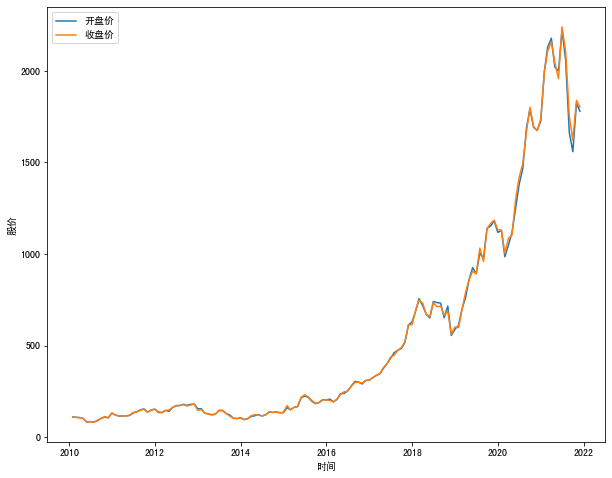

In [18]:
figure, ax = plt.subplots(figsize=(10,8))
ax.plot(df_k.index,df_k.open,label='开盘价')
ax.plot(df_k.index,df_k.close,label='收盘价')
ax.set_xlabel('时间')
ax.set_ylabel('股价')
ax.legend()

In [19]:
df_k2 = df_k.query('date>="2021-01"')
df_k2

,open,close
date,,
2021-01-31,1999.98,1997.00
2021-02-28,2130.00,2109.32
2021-03-31,2179.00,2158.00
2021-04-30,2021.00,2044.50
2021-05-31,2000.00,1959.00
2021-06-30,2222.00,2240.95
2021-07-31,2059.97,2105.00
2021-08-31,1664.00,1755.00
2021-09-30,1559.00,1622.01


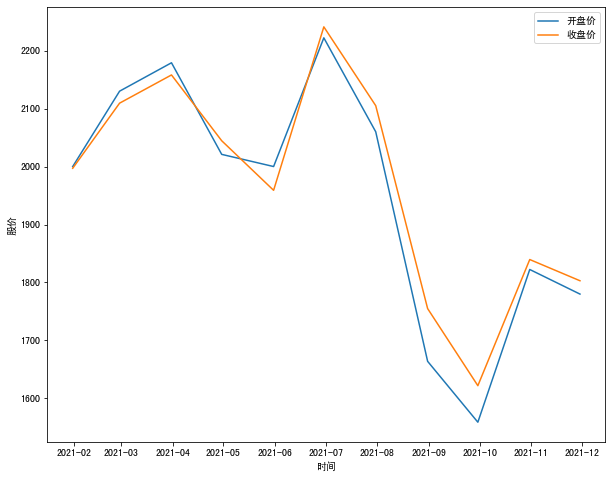

In [20]:
figure, ax2 = plt.subplots(figsize=(10,8))
ax2.plot(df_k2.index,df_k2.open,label='开盘价')
ax2.plot(df_k2.index,df_k2.close,label='收盘价')
ax2.set_xlabel('时间')
ax2.set_ylabel('股价')
ax2.legend()